Given a graph and assignments. We construct the $w-$stability condition in particular the set of line bundle multidegrees, after the chip-adding process.

# Functions

In [4]:
import numpy as np
import networkx as nx
from collections import Counter
#See paper for Gi graphs.

In [5]:
def get_sp_trees(G): #Out: list of edges in spanning tree
    all_trees=[]
    for g in list(G.spanning_trees()):
        all_trees.append(g.edges(sort=True, labels=False))
    return all_trees

In [6]:
def list_difference(a, b):
    "https://stackoverflow.com/questions/8106227/difference-between-two-lists-with-duplicates-in-python"
    count = Counter(a) # count items in a
    count.subtract(b)  # subtract items that are in b
    diff = []
    for x in a:
        if count[x] > 0:
           count[x] -= 1
           diff.append(x)
    return diff

In [7]:
def chip_adding(graph,tree,ass):
    """
    Inputs:
    graph,
    tree : spanning tree of graph
    ass : an n=vert(graph) tuple on the spanning tree.
    
    recursion idea: https://stackoverflow.com/questions/53638816/python-library-function-to-re-apply-a-function-to-its-own-output-until-output-re
    """
    
    edges=graph # just want the edges 
    n=len(ass)
    complement=list_difference(graph,tree)
    
    def rec_funct(edge_l,inputs,n):
        data=[]
        edge=edge_l[0]
        
        for b in inputs:
            delta_1=np.zeros(n)
            delta_2=np.zeros(n)
            
            delta_1[int(edge[0])-1]=1 #we chip add at the first vertex.
            delta_2[int(edge[1])-1]=1 #we chip add at the second vertex.
            
            b1=b+delta_1
            b2=b+delta_2
            data=data+[b1,b2]
        
        return (edge_l,data,n)
    
    def recursion(edge_l,inputs,n):
        
        new_data=rec_funct(edge_l,inputs,n)
        edge_l=edge_l[1:] #removeing first edge        
        new_data=(edge_l,new_data[1],new_data[2])
                
        if len(edge_l)==0:
            new_inputs=new_data[1]
            return new_inputs
        else:
            return recursion(*new_data)
        
    breaks=recursion(complement,[np.zeros(n)],n)
    breaks=np.unique(breaks, axis=0)
    
    patch=[]
    for bbreak in breaks:
        patch.append(ass+bbreak)
    
    return patch

In [8]:
def check_size(G,sigma):
    if len(sigma)==len(get_sp_trees(G)):
        x="This choice of assignments -- gives -- a stability condition."
    else: 
        x="This choice of assignments -- not give -- a stability condition."
    return x

## W-stability condition

In [9]:
def w_stability(graph,Assignments):
    
    """
    Inputs:
        graph: Any smallish finite multigraph
        Assignments: A list of (complexity of graph many) lists of length vert(graph).
    
    Outputs: a list of lists of length vert(graph) corresponding to liine bundle multidegrees obtained by chip adding.

    """
    G=graph
    
    G_edges=G.edges(sort=True, labels=False)
    tree_l=get_sp_trees(G)

    lbm_patches=[] # the set of patches,which we'll take the union of. 
    for index,tree in enumerate(tree_l):    
        ass=Assignments[index]    
        patch=chip_adding(G_edges,tree,ass)  
        
        # print("Patch",[x.astype(int).tolist() for x in patch],"\n") #If want to see patches of lbm.
        
        
        lbm_patches.append(patch)
    
    sig=np.concatenate(lbm_patches, axis=0)
    
    sig=sig.astype('int32')
    
#     print(np.array(sig))
    
    
    sig=np.unique(sig, axis=0)

    return sig

# Example graphs

Here we give examples of stability conditions for given graphs and assignments.
The main issue is finding assignments that produce stability conditions. 

## I3

In [10]:
Assignments=[[0,0,0],[0,0,0],[0,0,0]]
G=Graph([("1","2"),("2","3"),("1","3")], multiedges=True)
sigma=w_stability(G,Assignments)

print(check_size(G,sigma))

NameError: name 'Graph' is not defined

In [14]:
Assignments=[[0,0,0],[0,1,-1],[1,0,-1]]
G=Graph([("1","2"),("2","3"),("1","3")], multiedges=True)
sigma=w_stability(G,Assignments)

print(check_size(G,sigma))

This choice of assignments -- gives -- a stability condition.


In [15]:
Assignments=[[0,0,0],[0,1,-1],[1,-1,0]]
G=Graph([("1","2"),("2","3"),("1","3")], multiedges=True)
sigma=w_stability(G,Assignments)

print(check_size(G,sigma))

This choice of assignments -- not give -- a stability condition.


## I3 with multiple edges

In [1]:
# I3 with multiple edges

Assignments=[[0,0,0],[0,0,0],[0,0,0],[0,1,-1],[1,0,-1],[1,0,-1],[1,0,-1]]
G=Graph([("1","2"),("2","3"),("1","3"),("1","3"),("1","3")], multiedges=True)
print("Its necessary to have",len(get_sp_trees(G))," assignments")
sigma=w_stability(G,Assignments)
print(check_size(G,sigma))

for i in get_sp_trees(G):
    print(i)

NameError: name 'Graph' is not defined

## Double dollar 2

In [17]:
Assignments=[[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
G=Graph([("1","2"),("1","2"),("2","3"),("2","3")], multiedges=True)
# print("Its necessary to have",len(get_sp_trees(G))," assignments")
sigma=w_stability(G,Assignments)
# print(sigma)

print(check_size(G,sigma))

This choice of assignments -- gives -- a stability condition.


## Separating edge examples

In [18]:
# two dollar 2 graph connected by a separating edge.

Assignments=[[0,0,-1,1],[0,0,-1,1],[0,0,-1,1],[0,0,-1,1]]
G=Graph([("1","2"),("1","2"),("2","3"),("3","4"),("3","4")], multiedges=True)
# print("Its necessary to have",len(get_sp_trees(G))," assignments")

sigma=w_stability(G,Assignments)
print(sigma)
print(check_size(G,sigma))

[[ 0  1 -1  2]
 [ 0  1  0  1]
 [ 1  0 -1  2]
 [ 1  0  0  1]]
This choice of assignments -- gives -- a stability condition.


## Separating vertex examples

In [19]:
# I3 and dollar 2 graph (v3,v4) joined at vertex 3
# [0,0] assignments on Dollar graph

Assignments=[[0,0,0,0],[0,0,0,0],[0,1,-1,0],[0,1,-1,0],[1,0,-1,0],[1,0,-1,0]]
G=Graph([("1","2"),("2","3"),("1","3"),("3","4"),("3","4")], multiedges=True)
print("Its necessary to have",len(get_sp_trees(G))," assignments")

sigma=w_stability(G,Assignments)
# print(sigma)
print(check_size(G,sigma))

Its necessary to have 6  assignments
This choice of assignments -- gives -- a stability condition.


In [20]:
# I3 and dollar 2 graph (v3,v4) joined at vertex 3
# [-1,1] assignments on Dollar graph

Assignments=[[0,0,-1,1],[0,0,-1,1],[0,1,-2,1],[0,1,-2,1],[1,0,-2,1],[1,0,-2,1]]
G=Graph([("1","2"),("2","3"),("1","3"),("3","4"),("3","4")], multiedges=True)
print("Its necessary to have",len(get_sp_trees(G))," assignments")

sigma=w_stability(G,Assignments)
# print(sigma)
print(check_size(G,sigma))

Its necessary to have 6  assignments
This choice of assignments -- gives -- a stability condition.


# Visualising stability conditions

Here we consider the dollar 2 graph and I3 graphs,$\Gamma$. And visualise the intersection of "patches", $\sigma_{\Gamma}(\Gamma;T_i)$ that constitute $\sigma_{\Gamma}(\Gamma)$.

## Functions 2D

In [21]:
# from sympy import *
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
# init_printing()

In [22]:
def plt_ass(ass):
    lass=[list(s) for s in ass]
    plt.scatter(*zip(*lass), facecolor='red')
    return

In [23]:
def plt_sig(sig):
    lsig=[list(s) for s in sig]
    plt.scatter(*zip(*lsig), facecolor='green')
    return

## Dollar graph 2

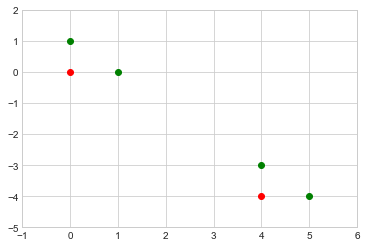

In [24]:
Assignments=[[0,0],[4,-4]] #Bad assignments
# G=Graph([("1","2"),("1","2")], multiedges=True)
# sigma=w_stability(G,Assignments)
sigma=[[0, 1],[1,0],[4,-3],[5,-4]] #For plots better

plt_sig(sigma)
plt_ass(Assignments)

plt.xlim([-1, 6])
plt.ylim([-5, 2])
         
plt.show()

### Varying assignments

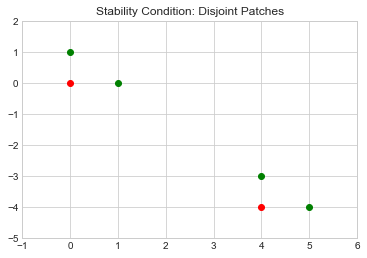

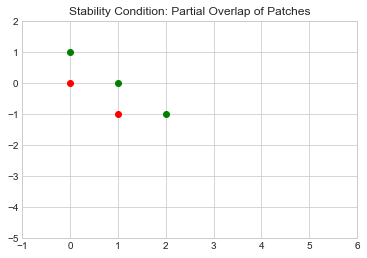

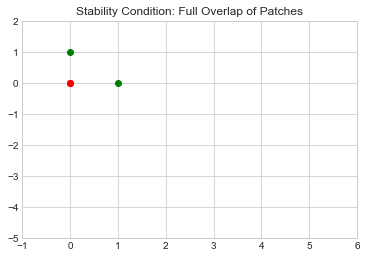

In [25]:
#Put 3 next to each other to show overlaps minamailty

k=4 # Vary k in integers.
Assignments_3=[[0,0],[k,-k]] #Good assignments
# sigma_3=w_stability(G,Assignments_3)
sigma_3=[[0, 1], [1, 0], [4, -3], [5, -4]]

plt_sig(sigma_3)
plt_ass(Assignments_3)
plt.title('Stability Condition: Disjoint Patches')
plt.xlim([-1, 6])
plt.ylim([-5, 2])

plt.show()

#=================================
k=1 # Vary k in integers.
Assignments_2=[[0,0],[k,-k]] #Good assignments
# sigma_2=w_stability(G,Assignments_2)
sigma_2=[[0, 1], [1, 0], [2, -1]] #print(sigma_2.tolist())

plt_sig(sigma_2)
plt_ass(Assignments_2)
plt.title('Stability Condition: Partial Overlap of Patches')
plt.xlim([-1, 6])
plt.ylim([-5, 2])
plt.show()

#=================================
k=0 # Vary k in integers.
Assignments_1=[[0,0],[k,-k]] #Good assignments
# sigma_1=w_stability(G,Assignments_1)
sigma_1=[[0, 1], [1, 0]]

plt_sig(sigma_1)
plt_ass(Assignments_1)
plt.title('Stability Condition: Full Overlap of Patches')
plt.xlim([-1, 6])
plt.ylim([-5, 2])
plt.show()

## Function 3D

In [28]:
def plot_data3d(assignments,sigma):

    #Dataset
    a_data=assignments # Set of assignments
    s_data=list(tuple(x) for x in sigma) #sigma data

    #Figure
    fig=plt.figure()
    fig = fig.gca(projection='3d')
    
    #Plotting
    fig.scatter(*zip(*a_data),c="red",marker='o') #assignemnts data
    fig.scatter(*zip(*s_data),c="green") #sigma data

    #Axis
    plt.title('Stability Condition')
    fig.set_xlabel('X-axis')
    fig.set_ylabel('Y-axis')
    fig.set_zlabel('Z-axis')

    #Showing
    plt.show()

## $I_3$

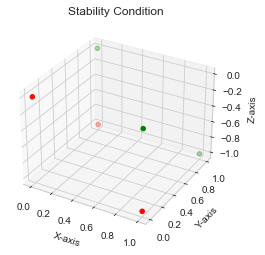

In [29]:
Assignments=[[0,0,0],[0,1,-1],[1,0,-1]] #good assignments non-trivial
G=Graph([("1","2"),("1","3"),("2","3")], multiedges=True)
sigma=w_stability(G,Assignments)
plot_data3d(Assignments,sigma)

### Varying assignments

Red points are assignments. Green are line bundle mulitdegrees. 

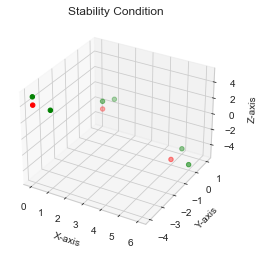

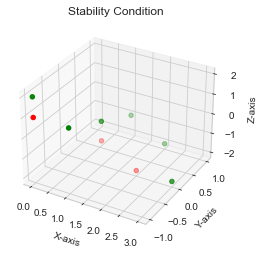

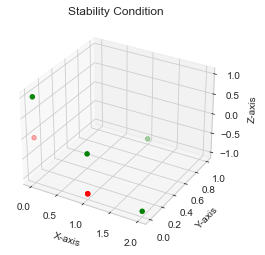

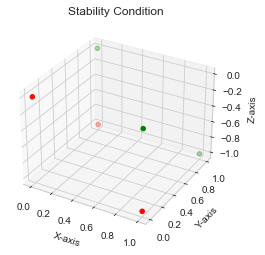

In [30]:
#Put 4 next to each other to show overlaps minamailty
# Varying assignments to see overlap

k=-5
Assignments_4=[[-k,0,k],[0,k+1,-1-k],[1,0,-1]] #Bad assignments
sigma_4=w_stability(G,Assignments_4)
plot_data3d(Assignments_4,sigma_4)

k=-2
Assignments_3=[[-k,0,k],[0,k+1,-1-k],[1,0,-1]] #Bad assignments
sigma_3=w_stability(G,Assignments_3)
plot_data3d(Assignments_3,sigma_3)

k=-1
Assignments_2=[[-k,0,k],[0,k+1,-1-k],[1,0,-1]] #Bad assignments
sigma_2=w_stability(G,Assignments_2)
plot_data3d(Assignments_2,sigma_2)

k=0
Assignments_1=[[-k,0,k],[0,k+1,-1-k],[1,0,-1]] #Bad assignments
sigma_1=w_stability(G,Assignments_1)
plot_data3d(Assignments_1,sigma_1)